In [11]:
import numpy as np 
import pandas as pd 
import joblib

In [8]:
df=pd.read_csv(r"E:\uber_demand_prediction\data\interim\df_without_outlier.csv",usecols=['pickup_longitude','pickup_latitude'])
df.head()

,pickup_longitude,pickup_latitude
0,-73.990372,40.734695
1,-73.980782,40.729912
2,-73.984550,40.679565
3,-73.993469,40.718990
4,-73.960625,40.781330


In [12]:
preprocessor_path=r"E:\uber_demand_prediction\src\model\preprocessor.joblib"
kmeans_path=r"E:\uber_demand_prediction\src\model\kmeans.joblib"
scaler_path=r"E:\uber_demand_prediction\src\model\scaler.joblib"

In [13]:
preprocessor=joblib.load(preprocessor_path)
scaler=joblib.load(scaler_path)
kmeans=joblib.load(kmeans_path)

In [14]:
kmeans

MiniBatchKMeans(n_clusters=50, random_state=42)

In [16]:
scaled_data=scaler.transform(df)

In [17]:
predictions=kmeans.predict(scaled_data)

In [18]:
predictions

array([44, 10,  5, ...,  0,  3,  0], shape=(32936609,), dtype=int32)

In [19]:
df['region']=predictions

In [20]:
df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,44
1,-73.980782,40.729912,10
2,-73.984550,40.679565,5
3,-73.993469,40.718990,39
4,-73.960625,40.781330,19


In [23]:
sampled_df=df.groupby('region').sample(500)

In [24]:
sampled_df.shape

(25000, 3)

In [25]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 491.5 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 590.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 711.9 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 778.2 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 827.5 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


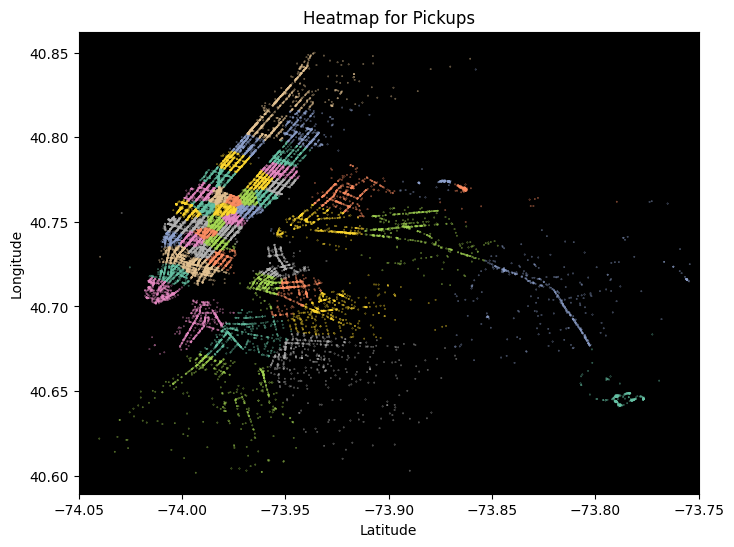

In [29]:
import matplotlib.pyplot as plt 
import seaborn  as sns

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(8,6))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_df['pickup_longitude'],sampled_df['pickup_latitude'],
           s=0.05,c=sampled_df['region'],cmap="Set2")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [33]:
save_path=r"E:\uber_demand_prediction\data\external/plot_data.csv"
sampled_df.to_csv(save_path,index=False)

In [34]:
# load the test data

data_path = r"E:\uber_demand_prediction\data\processed\testing_df.csv"

test_df = pd.read_csv(data_path, parse_dates=["tpep_pickup_datetime"]).set_index("tpep_pickup_datetime")

test_df

,region,ride_count,avg_ride,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5
tpep_pickup_datetime,,,,,,,,,
2016-03-01 00:00:00,0,72,85.0,1,102.0,86.0,73.0,95.0,107.0
2016-03-01 00:15:00,0,76,81.0,1,72.0,102.0,86.0,73.0,95.0
2016-03-01 00:30:00,0,50,69.0,1,76.0,72.0,102.0,86.0,73.0
2016-03-01 00:45:00,0,60,65.0,1,50.0,76.0,72.0,102.0,86.0
2016-03-01 01:00:00,0,56,62.0,1,60.0,50.0,76.0,72.0,102.0
...,...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,49,13,11.0,3,10.0,12.0,6.0,8.0,13.0
2016-03-31 23:00:00,49,20,15.0,3,13.0,10.0,12.0,6.0,8.0
2016-03-31 23:15:00,49,15,15.0,3,20.0,13.0,10.0,12.0,6.0


In [35]:
x_test=test_df.drop(columns=['ride_count'])
y_test=test_df['ride_count']


In [36]:
model_path=r"E:\uber_demand_prediction\src\model\model.joblib"
model=joblib.load(model_path)

In [37]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

In [38]:
pipeline

e:\uber_demand_prediction\env\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region', 'day_of_week'])])),
                ('model', LinearRegression())])

In [39]:
predictions=pipeline.predict(x_test)

In [40]:
predictions

array([72.80935396, 76.77587939, 53.42325409, ..., 16.09248107,
       22.52777637,  8.62122728], shape=(148800,))

In [43]:
sample_row=sampled_df.sample(1)
sample_row

,pickup_longitude,pickup_latitude,region
25293704,-73.966187,40.753639,13


In [46]:
scaled_row=scaler.transform(sample_row.iloc[:,0:2])
scaled_row

array([[0.26864653, 0.07446691]])

In [ ]:
import operator
distances=kmeans.transform(scaled_row).ravel().tolist()
distances=list(enumerate(distances))
soreted_distances=sorted(distances,key=operator.itemgetter(1))[0:9]
indexes=[ind[0] for ind in soreted_distances]
indexes

[13, 24, 25, 33, 12, 4, 46, 28, 41]

[(0, 6.799114116194045),
 (1, 0.7041705137935509),
 (2, 1.731248190492172),
 (3, 0.986127510415105),
 (4, 0.45951720991424083),
 (5, 2.736936863544813),
 (6, 1.4080912560984729),
 (7, 1.4192305587459806),
 (8, 1.7697672135532716),
 (9, 0.7649890848421668),
 (10, 1.0845891263901797),
 (11, 3.1051155484735258),
 (12, 0.424341386909696),
 (13, 0.129993519213625),
 (14, 1.5853201051677466),
 (15, 1.2612356250061691),
 (16, 2.8559672958686355),
 (17, 4.7313927900686),
 (18, 2.0901776488072015),
 (19, 1.0740177108583455),
 (20, 2.153339748612064),
 (21, 0.8716752788610276),
 (22, 2.527719045935046),
 (23, 1.0292975738269292),
 (24, 0.3022420711637787),
 (25, 0.39267062958248533),
 (26, 0.7955140888424065),
 (27, 3.821737672867435),
 (28, 0.5505361152372831),
 (29, 2.2803827556021217),
 (30, 1.5903787352753376),
 (31, 2.42683757394045),
 (32, 0.8838566808168253),
 (33, 0.4037117767429229),
 (34, 1.2601095737285495),
 (35, 1.0218063546393283),
 (36, 0.7877180489509721),
 (37, 1.403934307519958